<a href="https://colab.research.google.com/github/elvoza/Curso-Introductorio-a-Python/blob/main/Sesi%C3%B3n_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="120px" src="https://www.udea.edu.co/wps/wcm/connect/udea/df55724e-3ebc-46c6-b608-fb9206b3fede/facultad-economicas.png?MOD=AJPERES&CVID=nc5zPyj" align="Center" hspace="10px" vspace="10px"></p>


#***Python I - Introducción a modelos económicos y financieros con Python***

---


#**Sesión 7**
# Docente: *Cristian Ruiz Parra*

---
- Estadistica Descriptiva
- Annova
- Regresiones
- Pruebas de Bondad y ajuste
- Ejercicio practico

# Introducción:

El análisis exploratorio de datos (EDA del inglés Exploratory Data Analysis) se realiza con el fin de:

1. Resumir las principales características del conjunto de datos.
2. Entender mejor el conjunto de datos que se está tratando.
3. Establecer relaciones entre variables.
4. Determinar si una variables es un buen predictor de una variable blanco.
5. Extraer las variables más importantes.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis, norm, probplot
import warnings
from typing import Union, List, Dict, Tuple, Optional
import matplotlib.gridspec as gridspec


archivo = '/content/Base_Datos_Estadistica.csv'
df = pd.read_csv(archivo)

FileNotFoundError: [Errno 2] No such file or directory: '/content/Base_Datos_Estadistica.csv'

In [76]:
df.head()

,Name,Team,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,PG,25.0,187.96,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,SF,25.0,198.12,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,SG,22.0,195.58,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,PF,29.0,208.28,231.0,NaN,5000000.0
5,Amir Johnson,Boston Celtics,PF,29.0,205.74,240.0,NaN,12000000.0


In [77]:
#Observemos la calidad de los datos
df.isna().sum()

,0
Name,0
Team,0
Position,0
Age,0
Height,0
Weight,0
College,82
Salary,0


In [78]:
#Observemos los tipos que tienen nuestras variables
df.dtypes

,0
Name,object
Team,object
Position,object
Age,float64
Height,float64
Weight,float64
College,object
Salary,float64


# **Resumen Estadistica Descriptiva**

Antes de ponernos en la tarea de construir un modelo que pretenda predecir alguna característica del conjunto de datos, es importante realizar una exploración de los datos. La estadística descriptiva nos permite explorar los datos con el propósito de hallar las características principales, mediante la implementación de gráficas y el cálculo de algunas variable estadísticas. Para este fín, en Python, podemos hacer uso de:

- Medidas de tendencia central
- Medidas de dispersión
- Medidas de posición
- Medidas de Distribución
- representaciones gráficas y tabulares

In [79]:
# Para dar una descripción estadística de variables numéricas:
df.describe()

,Age,Height,Weight,Salary
count,446.000000,446.000000,446.000000,4.460000e+02
mean,26.919283,201.218117,221.753363,4.842684e+06
std,4.398951,8.728066,26.157899,5.229238e+06
min,19.000000,175.260000,161.000000,3.088800e+04
25%,24.000000,195.580000,200.000000,1.044792e+06
50%,26.000000,203.200000,220.000000,2.839073e+06
75%,30.000000,208.280000,240.000000,6.500000e+06
max,40.000000,220.980000,307.000000,2.500000e+07


In [80]:
# Para contabilizar variables categóricas:
df["Departamento"].value_counts()

KeyError: 'Departamento'

In [ ]:
datos= df['Años_Experiencia']
datos.head()

## 📌 Medidas de Tendencia Central (Centralidad)

Estas herramientas son fundamentales para la estadística descriptiva, ya que definen el punto alrededor del cual se agrupan los datos.

| Herramienta | Símbolo | Cálculo | Significado en Contexto |
| :--- | :--- | :--- | :--- |
| **Media Aritmética** | $\mu$ (Población) o $\bar{x}$ (Muestra) | Suma de todos los valores dividida por el número total de valores ($n$). | El **promedio** de los datos. Es sensible a **valores atípicos (outliers)**. |
| **Mediana** | $Me$ | El valor central de un conjunto de datos **ordenado**. Si $n$ es par, <br> es el promedio de los dos valores centrales. | Divide la distribución en dos mitades (50% por debajo y 50% por encima). <br> Es **robusta** ante valores atípicos. |
| **Moda** | $Mo$ | El valor o categoría que aparece con la **mayor frecuencia**. | El valor más **típico** o común. Útil para identificar picos en la distribución. |

In [ ]:
tc={
    'media': datos.mean(),
    'mediana': datos.median(),
    'moda': datos.mode().iloc[0] if not datos.mode().empty else np.nan}

print(tc)


In [ ]:


        # Estadísticas básicas
estadisticas = {
            'n': len(datos),
            'valores_faltantes': datos.isnull().sum(),
            'media': datos.mean(),
            'mediana': datos.median(),
            'moda': datos.mode().iloc[0] if not datos.mode().empty else np.nan,
            'desviacion_estandar': datos.std(),
            'varianza': datos.var(),
            'minimo': datos.min(),
            'maximo': datos.max(),
            'rango': datos.max() - datos.min(),
            'q1': datos.quantile(0.25),
            'q3': datos.quantile(0.75),
            'rango_intercuartil': datos.quantile(0.75) - datos.quantile(0.25),
            'asimetria': skew(datos),
            'curtosis': kurtosis(datos),
            'coef_variacion': (datos.std() / datos.mean()) * 100 if datos.mean() != 0 else np.inf,
            'suma': datos.sum(),
            'percentil_5': datos.quantile(0.05),
            'percentil_95': datos.quantile(0.95)}
print(estadisticas)

## ↕️ Medidas de Dispersión (Variabilidad)

Estas herramientas describen la **variabilidad** o la **extensión** de un conjunto de datos, es decir, cuán separados o dispersos están los valores entre sí.

| Herramienta | Símbolo | Cálculo | Significado en Contexto Empresarial |
| :--- | :--- | :--- | :--- |
| **Rango** | $R$ | Valor Máximo - Valor Mínimo. | Muestra la **amplitud total** de la variación. <br> Es muy sensible a los valores extremos (outliers). |
| **Rango Intercuartílico** | $IQR$ | Cuartil 3 ($Q_3$) - Cuartil 1 ($Q_1$). | Mide la dispersión del **50% central** de los datos. <br> Es la medida de dispersión más **robusta** ante valores atípicos. |
| **Varianza** | $\\sigma^2$ o $s^2$ | Promedio de las diferencias al cuadrado <br> de cada observación respecto a la media. | Es la base matemática para medir la dispersión. <br> Sus unidades están al cuadrado. |
| **Desviación Estándar** | $\\sigma$ o $s$ | Raíz cuadrada de la Varianza. | La medida más común. Indica la **dispersión promedio** <br> en las **mismas unidades** que los datos. |
| **Coeficiente de Variación** | $CV$ | Desviación Estándar $\\div$ Media. | Permite **comparar la variabilidad** de dos conjuntos de datos <br> con diferentes unidades o escalas. |



In [ ]:
md=     {
        'desviacion_estandar': datos.std(),
        'varianza': datos.var(),
        'minimo': datos.min(),
        'maximo': datos.max(),
        'rango': datos.max() - datos.min(),
        'coeficiente_variacion':(datos.std()/datos.mean())*100}

print(md)

## 📐 Medidas de Posición (Localización)

Estas herramientas dividen el conjunto de datos, una vez ordenado, en partes iguales. Esto permite identificar la ubicación relativa de una observación con respecto a toda la distribución.

| Herramienta | Símbolo | Partes Iguales | Significado en Contexto Empresarial |
| :--- | :--- | :--- | :--- |
| **Cuartiles** | $Q_1, Q_2, Q_3$ | 4 | Dividen los datos en cuatro secciones de 25% cada una. <br> $Q_2$ es la Mediana. <br> Útiles para el Diagrama de Caja (Box Plot).

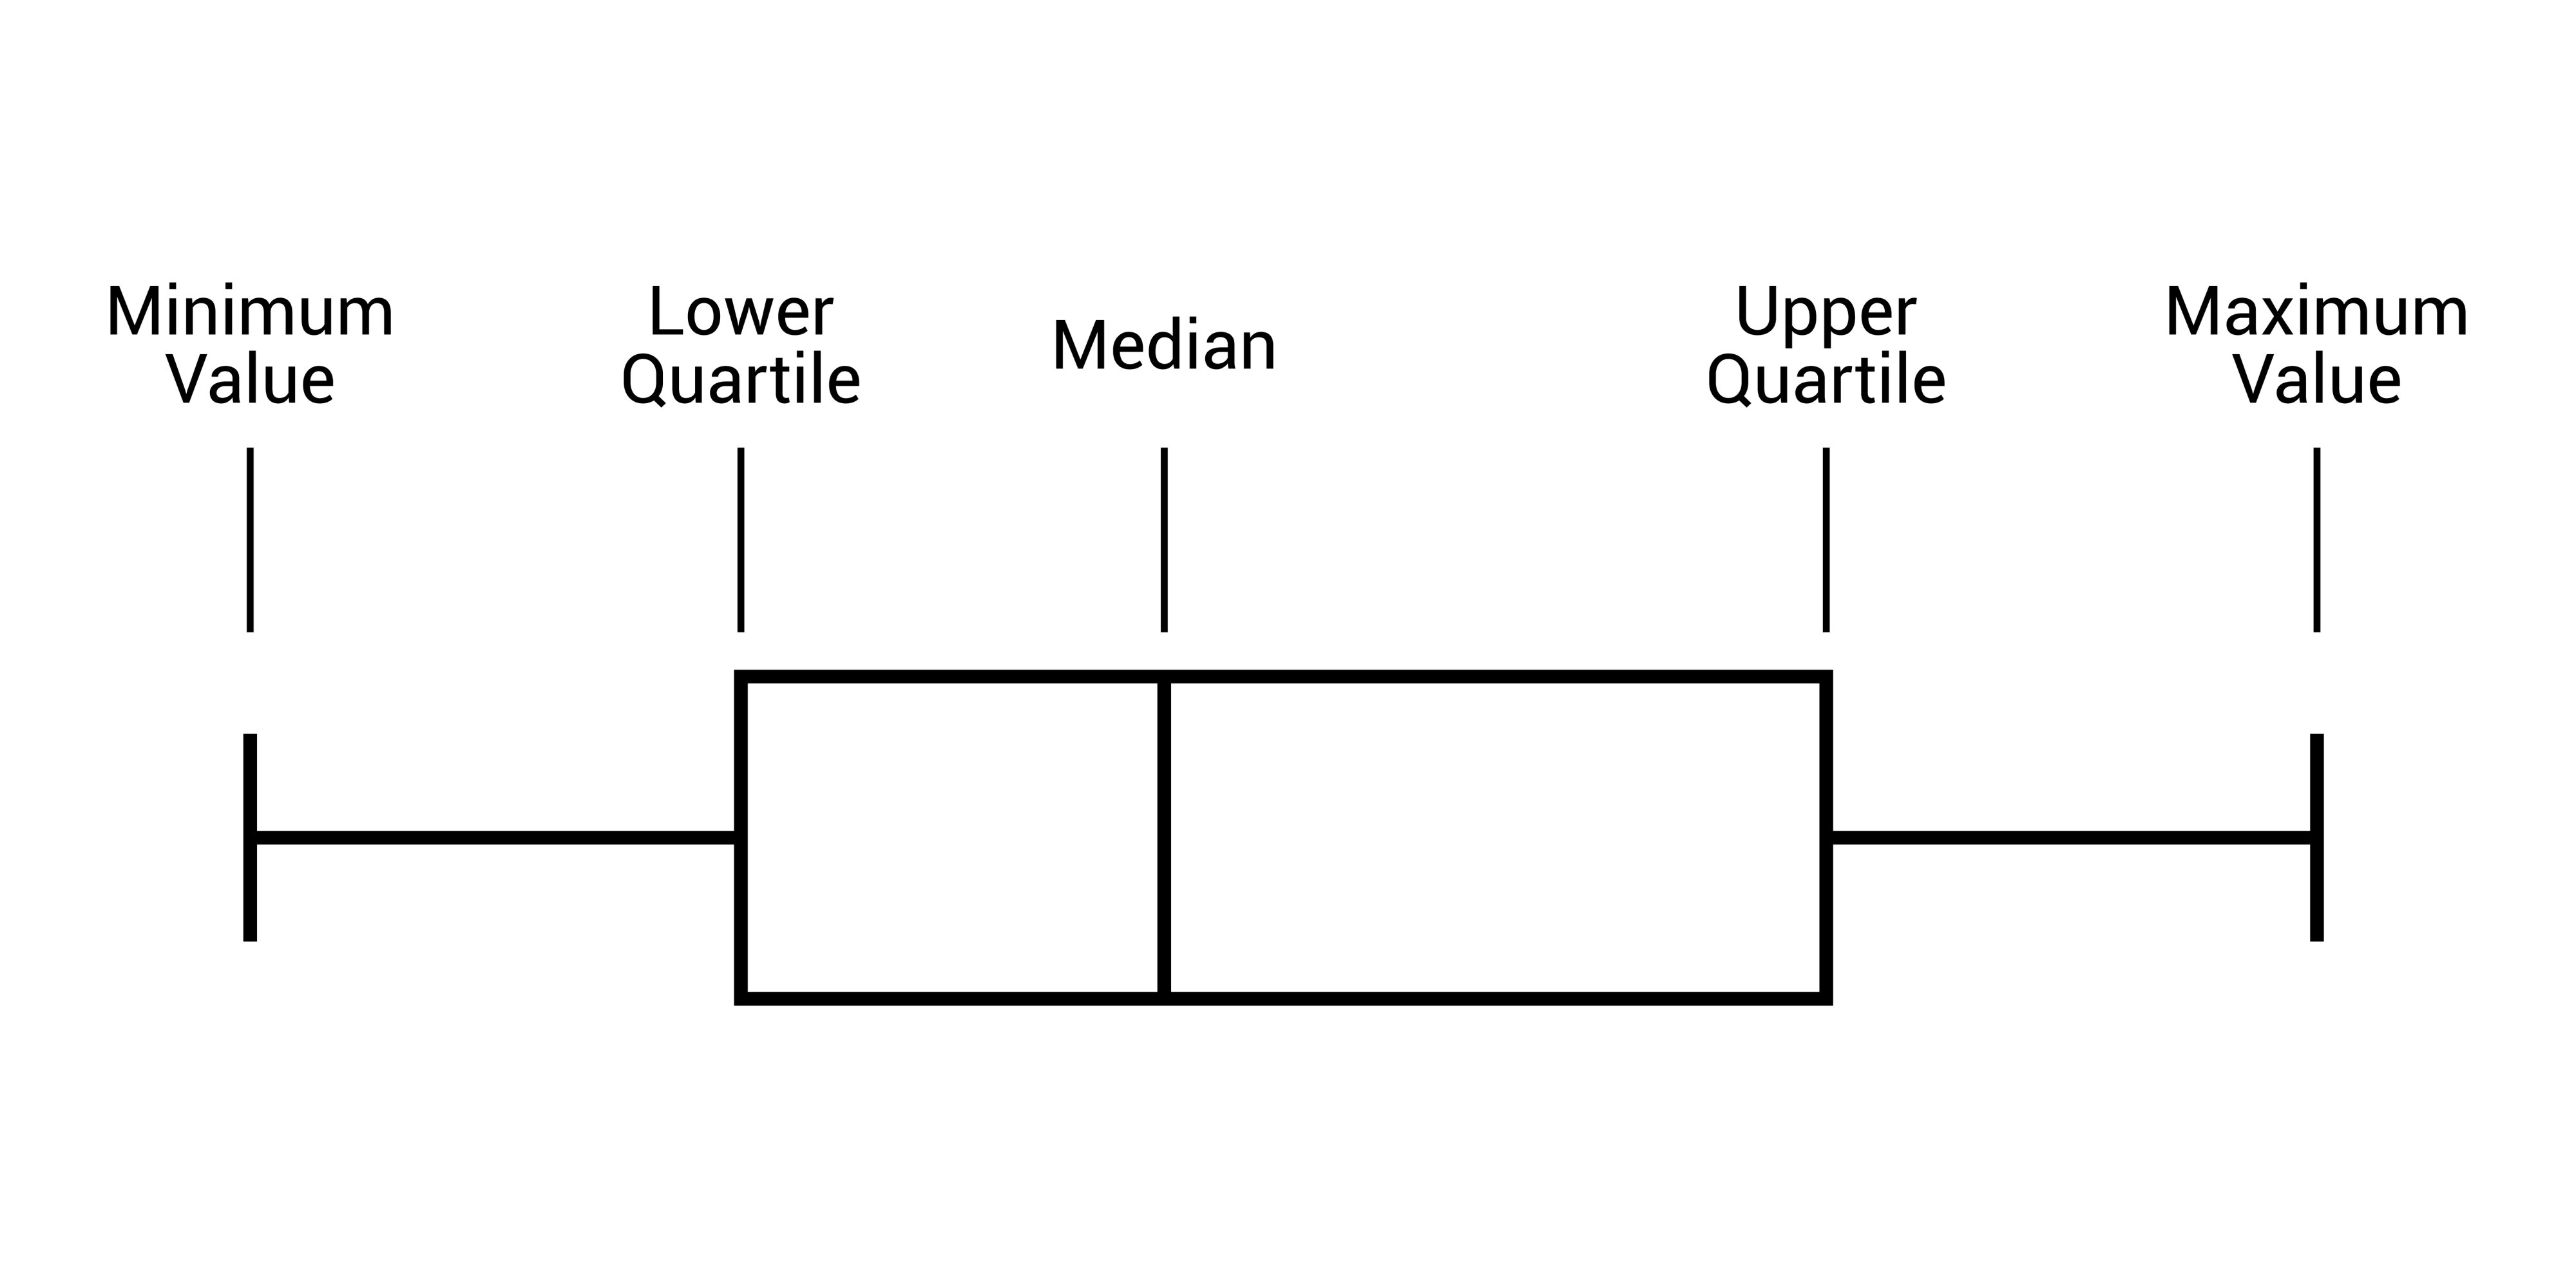


| Herramienta | Símbolo | Partes Iguales | Significado en Contexto Empresarial |
| :--- | :--- | :--- | :--- |
| **Deciles** | $D_1$ a $D_9$ | 10 | Dividen los datos en diez secciones de 10% cada una. <br> Se usan a menudo para clasificar el rendimiento o el ingreso en grupos del 10%. |
| **Percentiles** | $P_1$ a $P_{99}$ | 100 | El percentil $P_k$ indica que el $k\\%$ de los datos está por debajo de ese valor. <br> Comúnmente usados para estandarizar puntajes de evaluación. |
| **Puntaje Z** | $Z$ | N/A | Mide a cuántas **desviaciones estándar** se encuentra un valor individual ($x$) de la media ($\mu$). <br> Permite comparar valores de distribuciones diferentes.


In [ ]:
mp={
            'q1': datos.quantile(0.25),
            'q3': datos.quantile(0.75),
            'd10%':datos.quantile(0.1),
            'd20%':datos.quantile(0.2),
            'd30%':datos.quantile(0.3),
            'd40%':datos.quantile(0.4),
            'd50%':datos.quantile(0.5),
            'rango_intercuartil': datos.quantile(0.75) - datos.quantile(0.25)}

print(mp)

## 🔀 Medidas de Forma (Distribución)

Estas herramientas describen la forma o simetría de la distribución de los datos, comparándola generalmente con una distribución normal (o campana de Gauss).

| Herramienta | Símbolo | Cálculo | Significado en Contexto Empresarial |
| :--- | :--- | :--- | :--- |
| **Asimetría (Skewness)** | $g_1$ o $S_k$ | Mide la falta de simetría de la distribución. | Indica si la distribución se extiende más hacia un lado que hacia el otro. <br> **Positiva (> 0):** Cola larga a la derecha (datos concentrados a la izquierda). <br> **Negativa (< 0):** Cola larga a la izquierda (datos concentrados a la derecha).

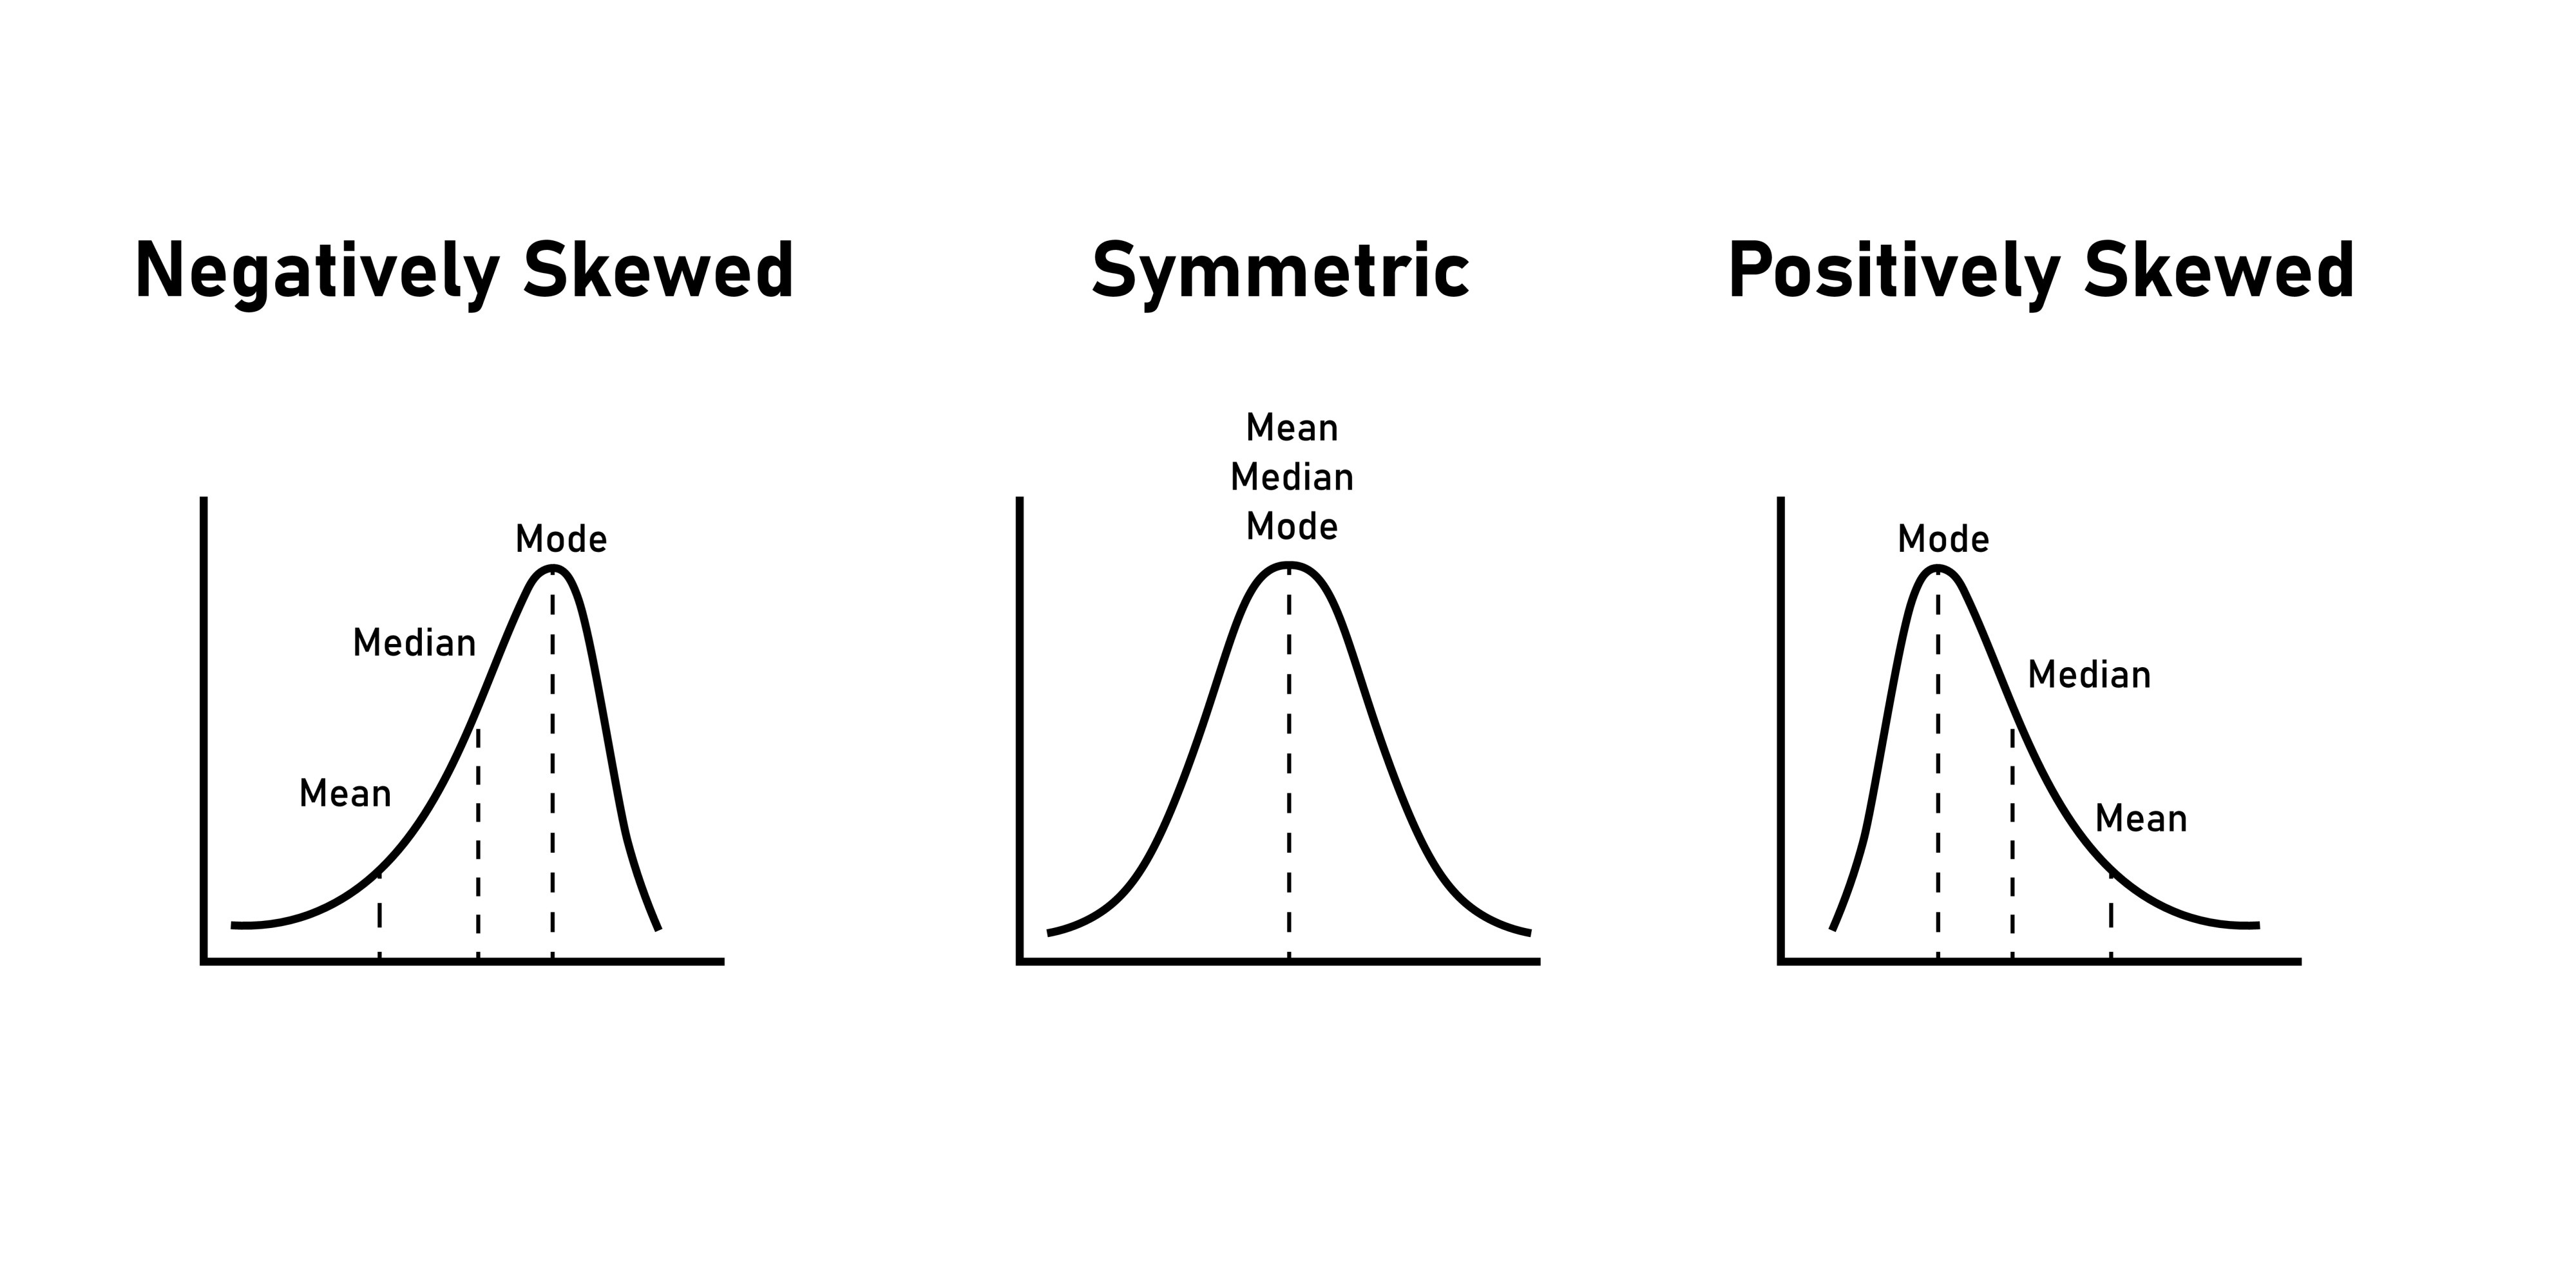

 | Herramienta | Símbolo | Cálculo | Significado en Contexto Empresarial |
| :--- | :--- | :--- | :--- |
| **Curtosis (Kurtosis)** | $g_2$ o $K$ | Mide el "apuntamiento" (peakedness) y la "pesadez de las colas" de la distribución. | Mide la cantidad de datos que se encuentran en los extremos (colas) y el centro. <br> **Mesocúrtica ($\approx$ 0):** Similar a la Normal. <br> **Leptocúrtica (> 0):** Más apuntada y con colas más pesadas (más outliers). <br> **Platicúrtica (< 0):** Más plana y con colas más ligeras. |

<p><img alt="Colaboratory logo" height="300px" src="https://brandata.com.mx/wp-content/uploads/2023/06/curtosis.jpg" align="Center" hspace="10px" vspace="10px"></p>


In [ ]:
mf={
            'asimetria': skew(datos),
            'curtosis': kurtosis(datos)}
print(mf)

In [ ]:
datos.plot.kde(bw_method=None, ind=None)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# --- 2. Generación de Datos de Distribución Normal (REFERENCIA) ---
# Usamos la misma media y desviación estándar de los datos de Ingreso para hacer una comparación justa
media_referencia = datos.mean()
std_referencia = datos.std()

# Generamos una distribución perfectamente Normal con los mismos parámetros
normal_data = np.random.normal(loc=media_referencia, scale=std_referencia, size=3000)
df_normal = pd.DataFrame({'Distribucion_Normal': normal_data})


# --- 3. Generar el Gráfico Comparativo ---
plt.figure(figsize=(12, 7))

# Gráfico 1: La variable real (Ingreso_Mensual)
sns.kdeplot(
    x=datos,
    fill=True,
    color='blue',
    alpha=0.4,
    linewidth=2,
    label='Años de experiencia'
)

# Gráfico 2: La distribución Normal de referencia
sns.kdeplot(
    x=df_normal['Distribucion_Normal'],
    fill=False, # No rellenamos para que se vea la diferencia claramente
    color='red',
    linestyle='--', # Línea punteada para el contraste
    linewidth=2,
    label=f'Referencia Normal (Media={media_referencia:.0f})'
)

# Personalización
plt.title('Comparación: Años de experiencia vs. Distribución Normal', fontsize=16, fontweight='bold')
plt.xlabel('Valor ($)', fontsize=12)
plt.ylabel('Densidad (Probabilidad)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

## 📉 Representaciones Gráficas y Tabulares

Estas herramientas de organización y visualización son esenciales para comunicar de manera efectiva los hallazgos de la estadística descriptiva.

| Herramienta | Tipo de Datos Ideal | Propósito y Aplicación |
| :--- | :--- | :--- |
| **Tabla de Frecuencias** | Categóricos y Continuos (Agrupados) | Organiza el conteo (frecuencia absoluta) y el porcentaje (frecuencia relativa) de cada valor o categoría. <br> Es el primer paso para cualquier análisis descriptivo. |
| **Histograma** | Continuos | Muestra la **distribución de frecuencia** de una variable continua, agrupando los datos en **clases** o intervalos. <br> Permite visualizar la forma (simetría, curtosis) y la dispersión.


<br>
<br>

 | Herramienta | Tipo de Datos Ideal | Propósito y Aplicación |
| :--- | :--- | :--- |
| **Diagrama de Barras** | Categóricos | Compara el tamaño o la frecuencia de diferentes categorías (e.g., número de empleados por **Departamento**). <br> Los espacios entre barras enfatizan que las categorías son discretas. |
| **Diagrama de Caja (Box Plot)** | Continuos | Visualiza los cinco números resumen: Mínimo, $Q_1$, **Mediana**, $Q_3$ y Máximo (o Bigotes). <br> Es la mejor herramienta para identificar la dispersión (IQR) y la presencia de **valores atípicos (outliers)**.

<br>
<br>


 | Herramienta | Tipo de Datos Ideal | Propósito y Aplicación |
| :--- | :--- | :--- |
| **Diagrama de Dispersión** | Bivariado (2 Continuos) | Muestra la **relación o correlación** entre dos variables continuas (e.g., **Años de Experiencia** vs. **Ingreso Mensual**). <br> Primer paso crucial en el análisis de **Regresión**. |
| **Gráfico de Sectores (Pie Chart)** | Categóricos (con pocas categorías) | Muestra la proporción de cada categoría con respecto al total (100%). <br> Útil para visualizar la composición de un todo. |


In [ ]:
df_group = df[['Años_Experiencia','Nivel_Educativo','Ingreso_Mensual']]

# Agrupamiento de los resultados
df_grupo1 = df_group.groupby(['Nivel_Educativo'], as_index = False).mean().sort_values(by = "Ingreso_Mensual", ascending = False).reset_index(drop = True)
df_grupo1

In [ ]:
# grouping results
grupo_test = df_group.groupby(['Años_Experiencia','Nivel_Educativo'], as_index = False).mean().sort_values(by = "Ingreso_Mensual", ascending = False).reset_index(drop = True)
grupo_test

In [ ]:
grouped_pivot = grupo_test.pivot(index = 'Años_Experiencia', columns = 'Nivel_Educativo')

In [ ]:
grouped_pivot

In [ ]:
grouped_pivot.isna().sum()

In [ ]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='jet')

#labels
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate the labels
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [ ]:
medias_por_columna = grouped_pivot.mean()
medias_por_columna

In [ ]:
grouped_pivot_imputado = grouped_pivot.fillna(medias_por_columna)

NameError: name 'grouped_pivot_imputado' is not defined

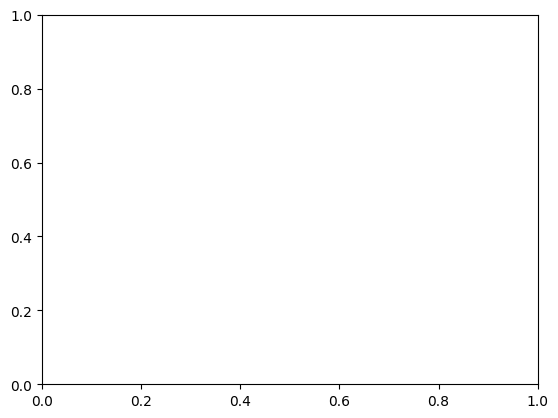

In [81]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot_imputado, cmap='jet')

#labels
row_labels = grouped_pivot_imputado.columns.levels[1]
col_labels = grouped_pivot_imputado.index

#move ticks to the center
ax.set_xticks(np.arange(grouped_pivot_imputado.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot_imputado.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate the labels
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [ ]:
df.hist(figsize=(15,13))
plt.show()

In [ ]:
# test linearity
df.plot(kind="scatter", y = "Ingreso_Mensual", x = "Años_Experiencia", alpha = 0.4)

In [ ]:
from scipy.stats import skewtest, levene

# Prueba la hipótesis nula de que la asimetría de la población de la que se extrajo la muestra es la misma que la de una distribución normal correspondiente.
print(skewtest(df["Ingreso_Mensual"]))
print(skewtest(df["Años_Experiencia"]))

# Prueba la hipótesis nula de que todas las muestras de entrada provienen de poblaciones con varianzas iguales.
print(levene(df["Ingreso_Mensual"],df["Años_Experiencia"]))

#Un valor p menor significa que hay evidencia más sólida a favor de la hipótesis alternativa.

In [ ]:
corr_p = df.corr(numeric_only=True)
corr_k = df.corr(method = "kendall", numeric_only=True)
corr_s = df.corr(method = "spearman", numeric_only=True)

corr_k

In [ ]:
corr_p["Ingreso_Mensual"].sort_values(ascending=False)

In [ ]:
corr_k["Ingreso_Mensual"].sort_values(ascending=False)

Otra forma de verificar la correlación entre los atributos es usar el método scatter_matrix, que dibuja cada atributo numérico contra cualquier otro atributo numérico. Como tenemos 29 columnas (se generarían
 gráficos), grafiquemos solo algunos de los atributos que tienen más correlación con el Salario Mensual:

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Ingreso_Mensual","Años_Experiencia","Productividad_Score","Edad"]

scatter_matrix(df[attributes], figsize=(12, 8))

La diagonal principal estaría llena de líneas rectas si Pandas dibujara cada variable contra sí misma, lo que no sería muy útil. En su lugar, Pandas muestra un histograma de cada atributo.

La librería seaborn nos permite realizar gráficos como el anterior o, por ejemplo, en un mapa de calor, mediante las funciones pairplot() y heatmap(), respectivamente.

In [ ]:
sns.pairplot(df, hue = "Ingreso_Mensual", vars = ["Años_Experiencia","Productividad_Score","Edad"], palette="viridis")

# **Análisis de varianza (ANOVA)**

El análisis de varianza es un método estadístico que se usa para probar si existe diferencias significativas entre las medias de dos o mas grupos. ANOVA arroja como resultados dos parámetros:

F-test score: En ANOVA se asume que todos los valores medios de los diferentes grupos son el mismo, se calcula que tanto se desvia de este supuesto y se reporta por medio del puntaje F-test. Entre más grande sea este valor, mayor diferencia existirá entre los valores medios.

P-Value: Este valor nos indica que tanta significancia estadística tienen nuestro puntaje.

Si la variable Ingreso Mensual que estamos analizando esta fuertemente correlacionada con una variable, esperamos que ANOVA nos devuelva un puntaje razonable del F-test y un valor pequeño del P-Value.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols #Ordinary linear squares

anova_hp=ols('Ingreso_Mensual ~ Años_Experiencia', data=df).fit()
sm.stats.anova_lm(anova_hp)

In [82]:
anova_hp.summary()

NameError: name 'anova_hp' is not defined

Podemos acceder a intervalos de confianza en nuestra predicción usando la función wls_prediction_std

In [ ]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

_, iv_l, iv_u = wls_prediction_std(anova_hp)

plt.figure(figsize=(8,6))
plt.plot(df.Años_Experiencia, df.Ingreso_Mensual, 'o', label="data")
plt.plot(df.Años_Experiencia, anova_hp.fittedvalues, 'r*', label="OLS")
plt.plot(df.Años_Experiencia, iv_u, 'r-.',alpha=0.3)
plt.plot(df.Años_Experiencia, iv_l, 'r-.',alpha=0.3)
plt.legend(loc='upper left')
plt.show()

Podemos crear modelos también con la combinación de varias variables, e incluso usar variables categóricas anteponiendo una C al nombre, y el método se encargará de su conversión a numérica.

In [ ]:
anova_cat=ols('Ingreso_Mensual ~ C(Nivel_Educativo)+Años_Experiencia', data=df).fit()
sm.stats.anova_lm(anova_cat)

Statsmodels nos permite acceder a varias cantidades de interés para el modelo.

Puede acceder atodas las opciones en la documentación

In [ ]:
print('Parametros: ', anova_cat.params[:5])
print('Errores estándar: ', anova_cat.bse[:5])
print('Valores predichos: ', anova_cat.predict()[0:5])
print('R2: ', anova_cat.rsquared)
print('Valores p:', anova_cat.pvalues[:5])

In [ ]:
anova_cat.summary()

# **ANOVA para la reducción dimensional**


También es posible aprovechar el análisis ANOVA para hacer reducción dimensional o limpieza de ruido, ya que éste nos entrega información sobre qué variables son más importantes para el modelado.

Veamos qué tal funciona éste método para limpar de ruido nuestros datos si los usamos para predecir el precio del auto.

In [ ]:
df['Ingreso_Mensual'] = df['Ingreso_Mensual'].astype(float)
print(df['Ingreso_Mensual'].head())

In [ ]:
#para ésta demostración usaremos solo las columnas con tipo flotante
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
d = df.dtypes=='float64'
df_float = df.loc[:,d]

In [83]:
#generamos nuevas columnas con ruido aleatorio
rng = np.random.RandomState(42)
ruido = rng.normal(size=(df.shape[0], 10))
df_ruido =pd.DataFrame(ruido)

In [84]:
df2 = pd.concat([df_float,df_ruido],axis=1)

NameError: name 'df_float' is not defined

In [ ]:

df2.head()

In [ ]:
y = df2['Ingreso_Mensual'] #variable dependiente (a predecir)
X = df2.drop(['Ingreso_Mensual'],axis=1) #variables independientes (features)

In [ ]:
X

In [ ]:
y

In [85]:
from sklearn.feature_selection import f_regression #f_classif para problemas de clasificación
from sklearn.feature_selection import SelectPercentile

In [86]:
X.columns = X.columns.astype(str)
select = SelectPercentile(score_func=f_regression, percentile=50)
select.fit(X, y)
X_sel = select.transform(X)


print("X_train",X.shape)
print("X_train_sel",X_sel.shape)

NameError: name 'X' is not defined

In [ ]:
import matplotlib.pyplot as plt
mask = select.get_support()
print([a for a in zip(X.columns,mask)])
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("indice")
plt.show()

Al haber limpiado el ruido, éstos datos deberían ser mejor para generar un modelo que usar todas las columnas disponibles.

Hagámos un experimento:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

select = SelectPercentile(score_func=f_regression,percentile=50)
select.fit(X_train, y_train)
X_sel = select.transform(X_train)

In [ ]:
X_test_sel = select.transform(X_test)
lr = LinearRegression()
lr_red = LinearRegression()
lr.fit(X_train, y_train)
lr_red.fit(X_sel, y_train)

In [ ]:
print("Precisión con todas las columnas: %.2f" %lr.score(X_test, y_test))
print("Precisión con las seleccionadas: %.2f" %lr_red.score(X_test_sel, y_test))

# **Ejercicio**

Para un conjunto de jugadores de la NBA, se desea evaluar si existe relación entre algunas variables asociadas a los jugadores.

El dataset de la NBA ('https://cdncontribute.geeksforgeeks.org/wp-content/uploads/nba.csv') contiene información de los jugadores, como su nombre, equipo, posición, edad, altura (pies-pulgadas), peso (libras) y salario anual.

## Pregunta 1

Cargar e inspeccionar el dataset

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis, norm, probplot
import warnings
from typing import Union, List, Dict, Tuple, Optional
import matplotlib.gridspec as gridspec

In [96]:
archivo = 'https://cdncontribute.geeksforgeeks.org/wp-content/uploads/nba.csv'
c = pd.read_csv(archivo)
c

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


## Pregunta 2

Eliminar las filas que tengan el salario nulo y la columna number, ya que esta no tiene ninguna relevancia

In [93]:

df.dropna(subset=['Salary'], inplace=True)
if 'Number' in df.columns:
    df.drop('Number', axis=1, inplace=True)

##Pregunta 3

Convertir la estatura de pies-pulgadas a centímetros.

1 pie=30.48cm
1 pulgada=2.54

In [94]:
def conver(a):
    pie,pulg=a.split("-")
    cms=int(pie)*30.48+int(pulg)*2.54
    return cms

## Pregunta 4

Construir un histograma con las cinco universidades con mas jugadores en la NBA

<Axes: xlabel='College'>

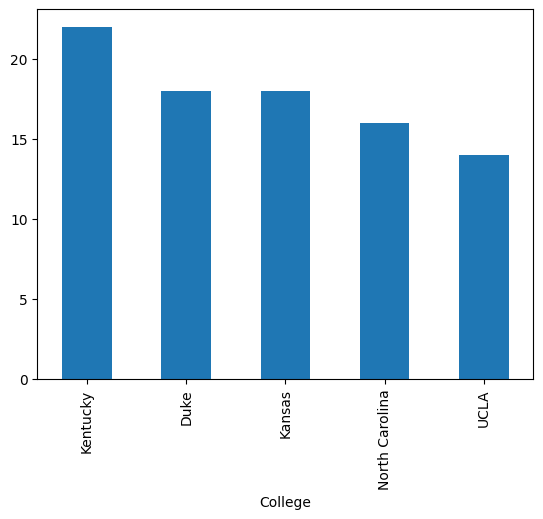

In [92]:
df.value_counts('College').head().plot(kind='bar')

## Pregunta 5

Construir un boxplot en el que se muestre los salarios vs las posiciones de los jugadores. Esto permite entender si los salarios varian significativamente dependiendo de la posición.

Las posibles posiciones son

* PG: point guard
* SG:shooting guard
* SF: small forward
* PF: power forward
* C: center

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

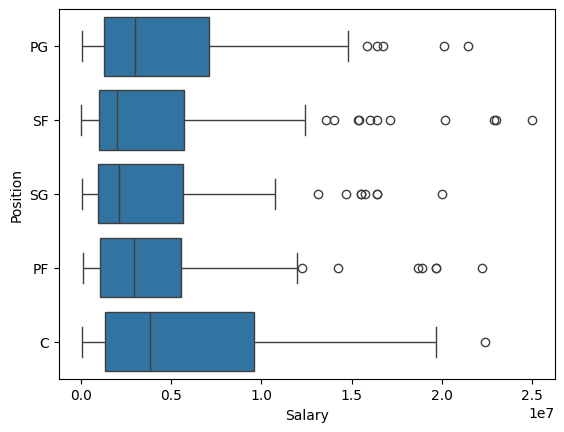

In [88]:
sns.boxplot(x= "Salary", y= "Position", data=df )
plt.show()

## Pregunta 6

Obtener los cinco equipos que pagan los salarios mas altos (sumando toda la nómina de sus jugadores)

In [97]:
df.groupby('Team').Salary.sum().sort_values(ascending=False).head()

,Salary
Team,
Cleveland Cavaliers,106988689.0
Los Angeles Clippers,94854640.0
Oklahoma City Thunder,93765298.0
Golden State Warriors,88868997.0
Chicago Bulls,86783378.0


## Pregunta 7

Construir una tabla pivot que muestre el salario promedio de los jugadores por equipo y posición para para los cinco equipos que pagan mejores salarios. Construir una representación visual de la información anterior usando heatmap.

In [102]:
salario2=list(df.groupby('Team').Salary.sum().sort_values(ascending=False).head().index)
salario2


['Cleveland Cavaliers',
 'Los Angeles Clippers',
 'Oklahoma City Thunder',
 'Golden State Warriors',
 'Chicago Bulls']

In [107]:
x= df[df['Team'].isin(salario2)]
x.head()

,Name,Team,Position,Age,Height,Weight,College,Salary
76,Leandro Barbosa,Golden State Warriors,SG,33.0,190.50,194.0,NaN,2500000.0
77,Harrison Barnes,Golden State Warriors,SF,24.0,203.20,225.0,North Carolina,3873398.0
78,Andrew Bogut,Golden State Warriors,C,31.0,213.36,260.0,Utah,13800000.0
79,Ian Clark,Golden State Warriors,SG,25.0,190.50,175.0,Belmont,947276.0
80,Stephen Curry,Golden State Warriors,PG,28.0,190.50,190.0,Davidson,11370786.0


In [109]:
p=dftop.pivot_table(index='Team',columns='Position',values='Salary',aggfunc='mean')
p

Position,C,PF,PG,SF,SG
Team,,,,,
Chicago Bulls,1.042438e+07,3.361007e+06,1.117153e+07,1.958160e+06,5.717549e+06
Cleveland Cavaliers,6.828957e+06,1.394101e+07,6.551592e+06,1.195889e+07,3.761809e+06
Golden State Warriors,6.541249e+06,7.275312e+06,8.457256e+06,3.766367e+06,6.316092e+06
Los Angeles Clippers,1.039480e+07,6.655482e+06,8.509072e+06,3.662924e+06,4.639893e+06
Oklahoma City Thunder,6.303143e+06,5.821013e+06,9.382869e+06,8.599621e+06,3.207058e+06


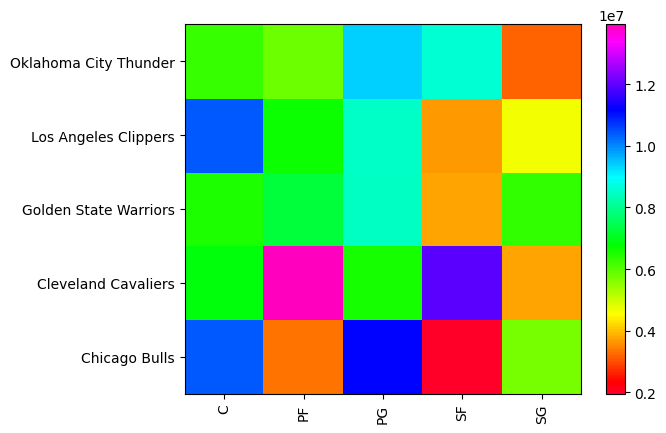

In [110]:
fig, ax = plt.subplots()
im = ax.pcolor(pivot, cmap='gist_rainbow')

row_labels = pivot.columns
col_labels = pivot.index

ax.set_xticks(np.arange(pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation=90)
fig.colorbar(im)
plt.show()

## Pregunta 8

Utilizar el método `scatter_matrix` para visualizar si existe algún tipo de correlación entre las variables numérocas del dataset

In [113]:
from pandas.plotting import scatter_matrix

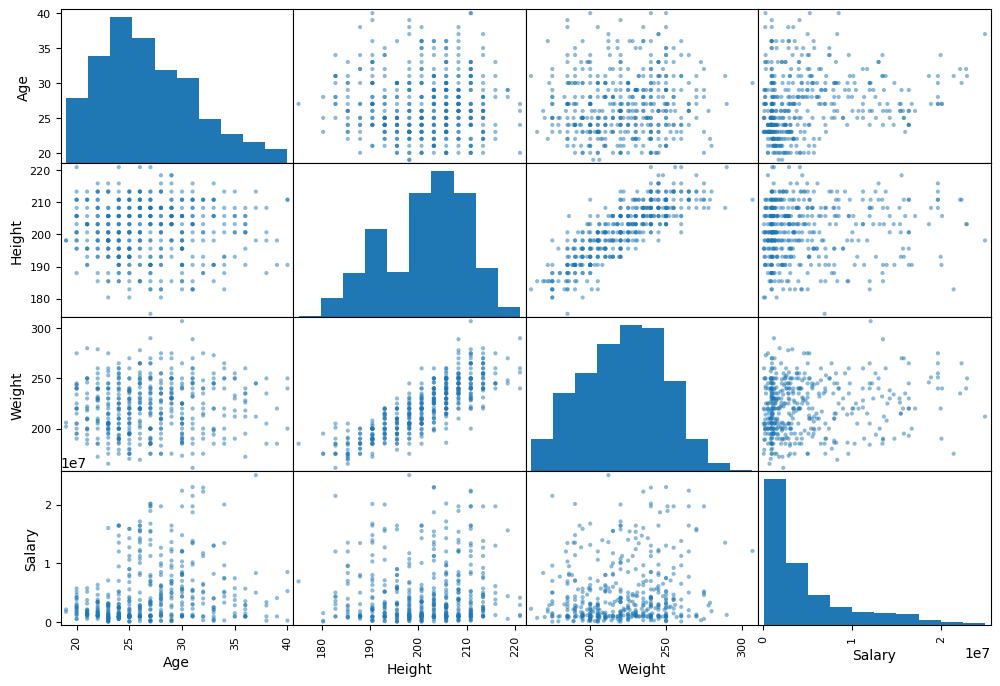

In [112]:
scatter_matrix(df, figsize=(12, 8))
plt.show()

## Pregunta 9

Corroborar los resultados anteriores calculando los coeficientes de correlación de Pearson para las variables numéricas del dataset

In [115]:
df.corr(method ='pearson', numeric_only=True)

,Age,Height,Weight,Salary
Age,1.000000,-0.015326,0.076597,0.213459
Height,-0.015326,1.000000,0.826604,0.058792
Weight,0.076597,0.826604,1.000000,0.138321
Salary,0.213459,0.058792,0.138321,1.000000


## Pregunta 10

Usar el método `pairplot` para evaluar visualizar si existe dependencia entre algunas de las variables numéricas y la posición de los jugadores.

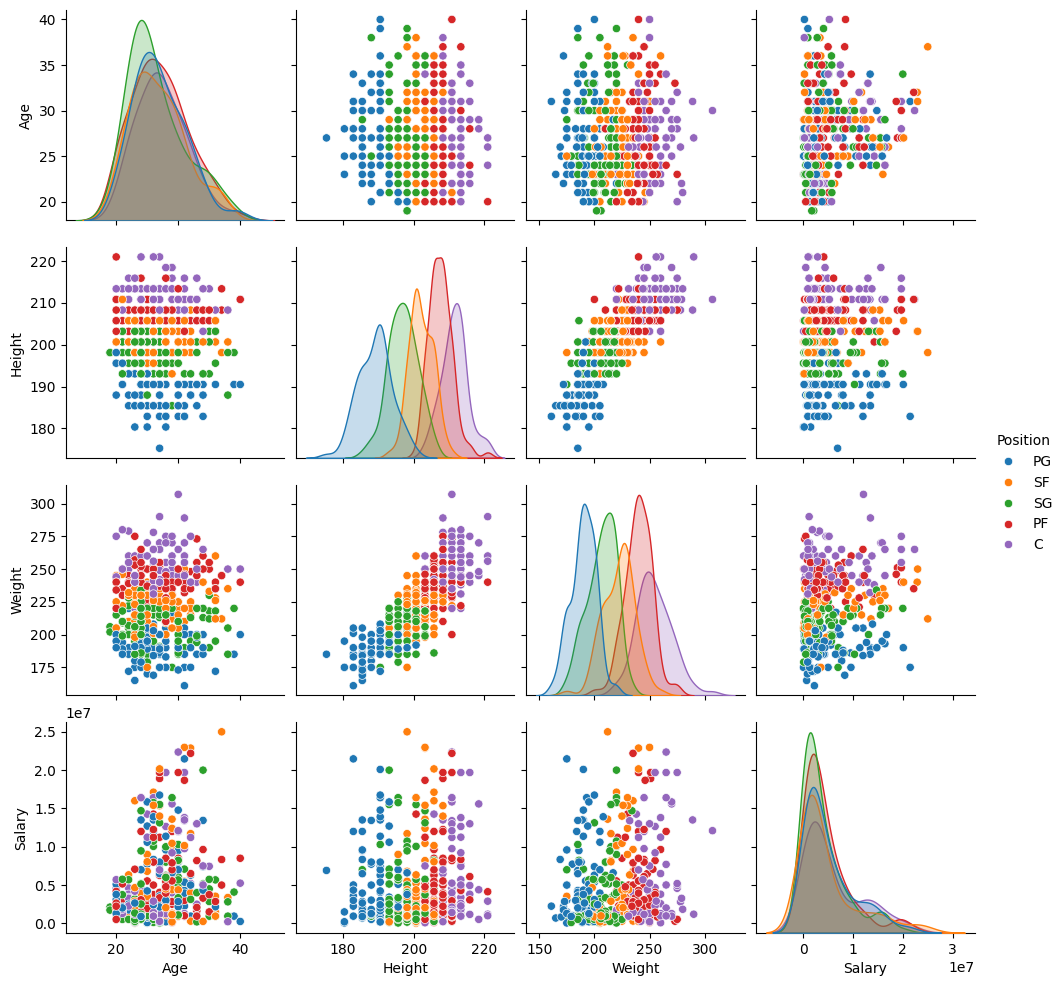

In [116]:
sns.pairplot(df, hue = "Position")

<p><a name="anova2"></a></p>

#  ANOVA II.

<p><a name="intro"></a></p>




El el test one-way ANOVA es una técnica que es usada para variables blanco numéricas ("Y", siguendo la notación establecida), usualmente una variable, y datos de entrada de solo una variable numérica o categórica, por tal motivo se le conoce como "one-way".

El test de análisis de varianzas puede pensarse como una generalización del t-test a más de dos grupos. En ANOVA, la **hipotesis nula** establece que **las medias de las poblaciones de las cuales se tomaron las muestras de los grupos son iguales**. De forma más concisa tenemos que:

 $\mu_1=\cdots=\mu_n$


Para un grupo de $n$ datos. La hipótesis alternativa sería que alguna de las medias de la ecuación anterior no se cumpla. Por lo tanto, tener un F-value alto y un p-value pequeño, implica que la probabilidad de que la hipótesis nula sea cierta es baja, por tanto, decimos que la hipotesis alternativa se debe cumplir.

Supongamos que queremos analizar una variable categórica y ver la correlación con otras variables.

Uno de los principales usos de ANOVA es el de analizar el impacto que las subcategorías tienen sobre en otra variable.

Por ejemplo, en el caso del dataset de carros, resultaría interesante responder a la pregunta:

* ¿Qué subcategorias de la categoría make (Fabricantes de carros), tienen algun impacto sobre la variable precio?.

Empecemos por cargar los datos de carros y volverlos a inspeccionar:

In [ ]:
import pandas as pd
import numpy as np

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

In [ ]:
dftest1 = df[["make","price"]].groupby("make").mean().sort_values(by="price")
dftest1.plot(kind="bar",figsize=(9,6))

De este gráfica se puede observar que existe una variación del precio medio a medida que nos movemos de izquierda a derecha en las diferentes marcas, no obstente, no sabemos cual marca de carro tienen el impacto más alto y cual menos en la predicción del precio.

Mediante ANOVA podemos ver si existe una diferencia significativa entre las medias de los precios de dos o más marcas.

Recuerdemos que ANOVA retorna dos valores:

F-value: Que representa la razón de la variación entre la media de los grupos y la variación dentro de cada grupo.

p-value: Que representa la probabilidad de que la hipótesis nula (medias iguales) sea cierta. El valor p respresenta entonces, la significancia estadística.

Veamos en una grafica de boxplots como se relacionan las diferentes marcas segun el precio.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x="make", y="price", data=df[["make","price"]])
plt.xticks(rotation=90)
plt.show()

De esta gráfica resulta dificil establecer si existe una correlación entre la variable categórica "marca" y el precio.

Con el fin de comprender más a fondo la finalidad de ANOVA y lo que mide, intentemos diferenciar entre precios de carro según las marcas.

Iniciemos la comparación entre dos grupos de marcas, aunque la finalidad de ANOVA consiste en diferenciar más de dos grupos (para diferenciar solo dos grupos, la prueba más adecuada es la t-student).

De la base de datos de carros, extraigamos solo la marca y el precio y almacenémoslo en un nuevo dataFrame:

In [ ]:
df_test = df[["make","price"]]
df_test.head()

Creemos una función que nos sirva para escoger dos marcas dadas dentro de la columna de make y que la guarde con el respectivo precio en una nueva variable. Sea esta función escoger2marcas:

In [ ]:
def escoger2marcas(df,marca1,marca2):
  locations = [bool(df.loc[i][0]==marca1)|bool(df.loc[i][0]==marca2) for i in range(len(df))]
  marca1_marca2 = df.loc[:][locations]

  return marca1_marca2

In [ ]:
Establezcamos dos pares de marcas cuyo valor medio difieran notablemente y cuyo valor medio sean aproximados con el fin de ver los resultados de un test ANOVA:

* Medias diferentes honda vs volvo.
* Medias similares volkswagen vs nissan.

In [ ]:
# Grupos de medias diferentes
honda_volvo = escoger2marcas(df_test,"honda","volvo")
sns.boxplot(x="make", y="price", data=honda_volvo)

Si comparamos dos grupos muy diferentes obtenemos un F-value elevado y un p-value pequeño.

Apliquemos ANOVA con scipy.stats:

NOTA: la función que verán a continuación de `get_group()` obtienen el subgrupo que se le pase al argumento dentro de una lista, es decir, `test2.get_group('reanault')` devuelve una lista del dataframe solo con la subcategoria `renault`.

Agrupemos primero por fabricante el data frame:

In [ ]:
df_test2 = df[['make', 'price']].groupby(['make'])
print(df_test2.get_group('honda'))
print(df_test2.get_group('volvo'))

Realicemos el test ANOVA mediante la librería de scipy y el módulo de stats:

In [ ]:
from scipy import stats

f_val, p_val = stats.f_oneway(df_test2.get_group('honda')['price'], df_test2.get_group('volvo')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

In [ ]:
# Grupos de medias similares
honda_volvo = escoger2marcas(df_test,"volkswagen","nissan")
sns.boxplot(x="make", y="price", data=honda_volvo)

In [ ]:
f_val, p_val = stats.f_oneway(df_test2.get_group('volkswagen')['price'], df_test2.get_group('nissan')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

Vemos que con ANOVA tenemos una "forma cuantitativa" de corroborar la inspección visual que se realiza con los boxplots.

Los resultados del test ANOVA para la comparación de este par de los grupos de marcas de carros es el siguiente:

honda vs volvo: El test ANOVA arroja un F-value alto y un p-value pequeño, lo que implica que deberíamos rechazar la hipótesis nula de que las medias de los grupos son aproximadamente iguales. En este sentido ambos grupos son diferentes y guardarian correlación con el precio.
volkswagen vs nissan: El test ANOVA arroja un F-value bajo y un p-value alto, lo que indica que debemos aceptar la hipótesis nula de que las medias son aproximadamente iguales y no guardarían correlación con el precio.

**Recapitulando**:

El test de análisis de varianzas (ANOVA - Analysis Of Variance) es un método estadístico usado para provar las diferencias entre dos o más grupos.

ANOVA se usa para el análisis de diferencias generales, en lugar de específicas, entre medias.

Mediante un test ANOVA, podemos averiguar si los resultados de un experimento o encuesta son significativos. En otras palabras, el test ANOVA nos permite rechazar o aceptar la hipótesis nula. Básicamente, lo que se hace es probar si existe una diferencia entre grupos. Algunos ejemplos en los que se puede aplicar este método son:

Un grupo de pacientes psiquiátricos está probando tres terapias diferentes: asesoramiento, medicación y biorretroalimentación, en el que se desea ver si una terapia es mejor que las otras.

Un fabricante que tiene dos procesos diferentes para hacer bombillas y quieren saber si un proceso es mejor que el otro.

Los estudiantes de diferentes universidades realizan el mismo examen y se desea ver si una universidad supera a la otra.

<p><a name="oneway"></a></p>

## One-way ANOVA: Incluyendo varios grupos.


Apliquemos ahora un test ANOVA sobre todos los grupos conformados por las diferentes marcas para ver su relación con el precio.

Tengamos que ANOVA lo podemos aplicar de dos formas:

1.   Mediante el módulo `stats` de `scipy`
2.   Mediante el módulo `statmodels`, ajustando un modelo a los datos.

Ambos métodos son similares pero cuentan con implementaciones de fondo, ligeramente diferentes , por lo que los resultados obtenidos de los valores F-value y p-value son, también, ligeramente diferentes.


**ANOVA - mediante el módulo stats de scipy**:

Procedamos a ver todas las marcas de carros de nuestro dataset:

In [ ]:
df["make"].unique()

In [ ]:
from scipy import stats
f_val, p_val = stats.f_oneway(df_test2.get_group('alfa-romero')['price'],df_test2.get_group('audi')['price'],df_test2.get_group('bmw')['price'],df_test2.get_group('chevrolet')['price'],df_test2.get_group('dodge')['price'],df_test2.get_group('honda')['price'],df_test2.get_group('jaguar')['price'],df_test2.get_group('mazda')['price'],df_test2.get_group('mercedes-benz')['price'],df_test2.get_group('mercury')['price'],df_test2.get_group('mitsubishi')['price'],df_test2.get_group('nissan')['price'],df_test2.get_group('peugot')['price'],df_test2.get_group('plymouth')['price'],df_test2.get_group('porsche')['price'],df_test2.get_group('renault')['price'],df_test2.get_group('saab')['price'],df_test2.get_group('subaru')['price'],df_test2.get_group('toyota')['price'],df_test2.get_group('volkswagen')['price'],df_test2.get_group('volvo')['price'])

print("ANOVA results: F=", f_val, ", P =", p_val)

**ANOVA - mediante statsmodels:**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

results = ols('price ~ C(make)', data=df).fit()
results.summary()

In [ ]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

De los resultados del test ANOVA para todas las las marcas, podemos concluir que puede ser un buen predictor del precio, no obstante, no podemos concluir cuales marcas no aportan diferencias en relación al precio.

Para hallar los grupos que contribuyen más a diferenciar los precios y cuales menos, debemos hacer un test post-hoc.